In [1]:
from funs_CTA102masterCodev4 import *

# CTA 102

In [2]:
## Original data:

CTA_data = pd.read_csv('4FGL_J2232.6+1143_weekly_17_10_2023.csv')
CTA_data_filtered = CTA_data[~CTA_data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'].str.contains('<|>', na=False, case=False)]
CTA_data_filtered.to_csv('CTA102_filtlight.csv')

CTAdata = pd.read_csv('CTA102_filtlight.csv')
dft, fj, fmean, rpsd, err_psd = psd_cal(CTAdata['Julian Date'], CTAdata['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'], CTAdata['Photon Flux Error(photons cm-2 s-1)'])

## Sim data:

n = 100
lc_storage = {}
# psd_storage = {}
for nn in range(n):
    lc_storage[nn] = pd.read_csv('lightcurveCTA102_sim_{}.dat'.format(nn), sep=r'\s+', comment='#', names=['Time', 'Flux'], engine='python')
#     psd_storage[nn] = pd.read_csv('PSDCTA102_sim_{}.txt'.format(nn), sep=r'\s+', comment='#', names=['Freq', 'Power'], engine='python')


/home/loramaya/funs_CTA102masterCodev4.py:40: RuntimeWarning: divide by zero encountered in log10
  freq = np.array(np.log10(frqj))
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide


/home/loramaya/funs_CTA102masterCodev4.py:40: RuntimeWarning: divide by zero encountered in log10
  freq = np.array(np.log10(frqj))
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/loramaya/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide


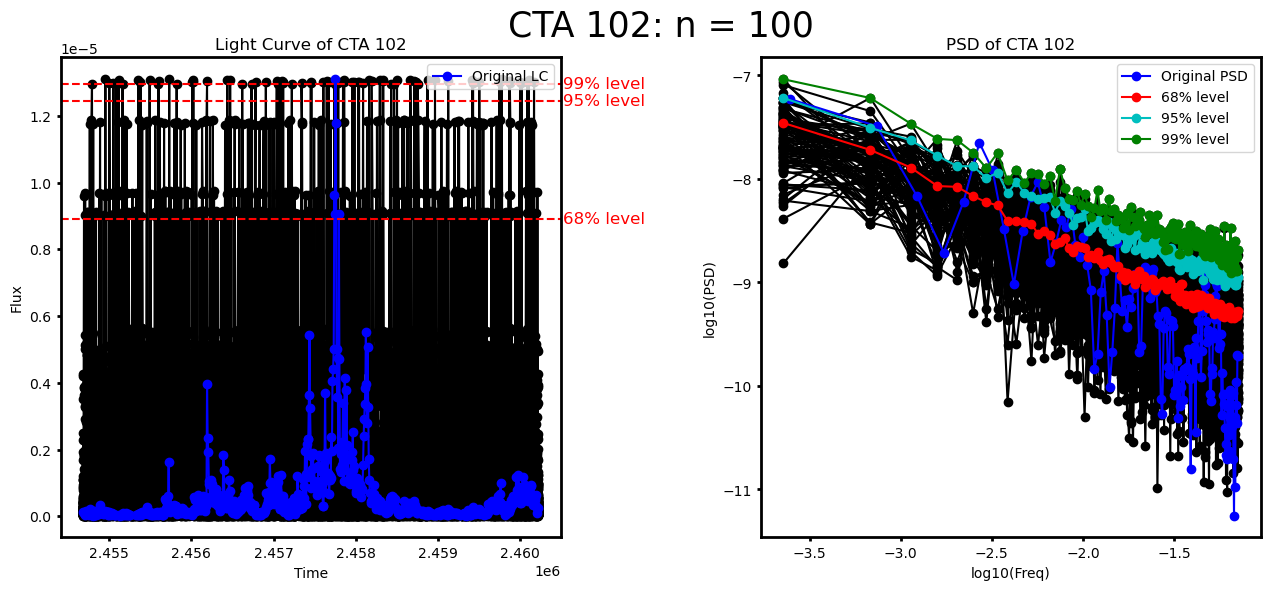

In [3]:
fig = plt.figure(figsize=(15, 6))
fig.set_facecolor('white')
fig.suptitle('CTA 102: n = {}'.format(n), fontsize = 25)
gs = GridSpec(1, 2, figure=fig)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

g = fig.add_subplot(gs[0, 0])
# conf_99_v = np.zeros(n)
# conf_95_v = np.zeros(n)
# conf_68_v = np.zeros(n)
flux_arrays = []
for NN in range(n):
    time = lc_storage[NN]['Time'] 
    flux = lc_storage[NN]['Flux']
#     means[NN] = np.mean(flux)
#     stds[NN] = np.std(flux)
#     conf_99_v[NN] = np.percentile(flux, 99)
#     conf_95_v[NN] = np.percentile(flux, 95)
#     conf_68_v[NN] = np.percentile(flux, 68)
    flux_arrays.append(flux)
    g.plot(time, flux, 'k-o')
g.plot(CTAdata['Julian Date'], CTAdata['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'], 'b-o', label = 'Original LC')
g.legend(loc = 'best')
g.set_title('Light Curve of CTA 102')
g.set_xlabel('Time')
g.set_ylabel('Flux')
stacked_flux = np.concatenate(flux_arrays)
# conf_99_v = 0.99*np.max(CTAdata['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
# conf_95_v = 0.95*np.max(CTAdata['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
# conf_68_v = 0.68*np.max(CTAdata['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
# un_sigma = np.mean(means) + np.mean(stds)
# two_sigma = np.mean(means) + 2 * np.mean(stds)
# three_sigma = np.mean(means) + 3 * np.mean(stds)
# four_sigma = np.mean(means) + 4 * np.mean(stds)
# five_sigma = np.mean(means) + 5 * np.mean(stds)
# print('LCs simulated:')
# # print('Standard desviation of all the LCs simulated:', np.mean(stds))
# print('68% level:', 0.68 * max(stacked_flux))
# print('95% level:', 0.95 * max(stacked_flux))
# print('99% level:', 0.99 * max(stacked_flux))
# print('4sigma level:', four_sigma)
# print('5sigma level:', five_sigma)
# print('\n')
g.axhline(y = 0.68 * max(stacked_flux), linestyle='--', label = '68% level', color = 'red')
g.text(max(CTAdata['Julian Date']) + 300, 0.68 * max(stacked_flux), '68% level', ha='left', va='center', color='red', fontsize=12)
g.axhline(y = 0.95 * max(stacked_flux), linestyle='--', label = '95% level', color = 'red')
g.text(max(CTAdata['Julian Date']) + 300, 0.95 * max(stacked_flux), '95% level', ha='left', va='center', color='red', fontsize=12)
g.axhline(y = 0.99 * max(stacked_flux), linestyle='--', label = '99% level', color = 'red')
g.text(max(CTAdata['Julian Date']) + 300, 0.99 * max(stacked_flux), '99% level', ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = four_sigma, linestyle='--', label = '4sigma', color = 'red')
# g.text(max(CTAdata['Julian Date']) + 300, four_sigma, r'4$\sigma$ = {:e}'.format(four_sigma), ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = five_sigma, linestyle='--', label = '5sigma', color = 'red')
# g.text(max(CTAdata['Julian Date']) + 300, five_sigma, r'5$\sigma$ = {:e}'.format(five_sigma), ha='left', va='center', color='red', fontsize=12)
for spine in ['top', 'right','bottom','left']:
    g.spines[spine].set_linewidth(2)
g.tick_params(labelsize=10,length=3,width=2)

g = fig.add_subplot(gs[0, 1])
# means_psd = np.zeros(n)
# stds_psd = np.zeros(n)
# conf_99_v = np.zeros(n)
# conf_95_v = np.zeros(n)
# conf_68_v = np.zeros(n)
rpsdm_array = []
for NN in range(n):
    
    time = lc_storage[NN]['Time'] 
    flux = lc_storage[NN]['Flux']
    dftm, fjm, fmeanm, rpsdm, err_psdm = psd_cal(time, flux, CTAdata['Photon Flux Error(photons cm-2 s-1)'])
#     freq = psd_storage[NN]['Freq'] 
#     power = psd_storage[NN]['Power']
#     means_psd[NN] = np.mean(rpsdm)
#     stds_psd[NN] = np.std(rpsdm)
#     conf_99_v[NN] = np.percentile(rpsdm, 99)
#     conf_95_v[NN] = np.percentile(rpsdm, 95)
#     conf_68_v[NN] = np.percentile(rpsdm, 68)

    rpsdm_array.append(rpsdm)
    g.plot(np.log10(fmeanm), rpsdm, 'k-o')
g.plot(np.log10(fmean), rpsd, 'b-o', label = 'Original PSD')
nfreq = len(fmeanm)
level_68 = np.zeros(nfreq)
level_95 = np.zeros(nfreq)
level_99 = np.zeros(nfreq)
rpsdm_total = np.array(rpsdm_array)
for FFF in range(nfreq):
    data_freq_bin = sorted(rpsdm_total[:, FFF])
    
    level_68[FFF] = data_freq_bin[int(0.68 * len(data_freq_bin))]
    level_95[FFF] = data_freq_bin[int(0.95 * len(data_freq_bin))]
    level_99[FFF] = data_freq_bin[int(0.99 * len(data_freq_bin))]
#     print(level_95[FFF])
    
    
# rpsdm_stack = np.concatenate(rpsdm_array)
# g.hist(rpsdm_stack, alpha = 0.5, bins=5, density=True, color = 'b', label='PSD', edgecolor = 'black')
g.plot(np.log10(fmeanm), level_68, 'r-o', label = '68% level')
g.plot(np.log10(fmeanm), level_95, 'c-o', label = '95% level')
g.plot(np.log10(fmeanm), level_99, 'g-o', label = '99% level')
                  
g.legend(loc = 'best')
g.set_title('PSD of CTA 102')
g.set_xlabel('log10(Freq)')
g.set_ylabel('log10(PSD)')
# conf_99_v = 0.99*np.min(rpsd)
# conf_95_v = 0.95*np.min(rpsd)
# conf_68_v = 0.68*np.min(rpsd)
# un_sigma_psd = np.mean(means_psd) + np.mean(stds_psd)
# two_sigma_psd = np.mean(means_psd) + 2 * np.mean(stds_psd)
# three_sigma_psd = np.mean(means_psd) + 3 * np.mean(stds_psd)
# print('Mean of all the PSDs simulated:', np.mean(means_psd))
# print('Standard desviation of all the PSDs simulated:', np.mean(stds_psd))
# print('1sigma level:', un_sigma_psd)
# print('2sigma level:', two_sigma_psd)
# print('3sigma level:', three_sigma_psd)
# print('PDSs simulated:')
# print('68% level:', 0.68 * min(rpsdm_stack))
# print('95% level:', 0.95 * min(rpsdm_stack))
# print('99% level:', 0.99 * min(rpsdm_stack))
# print('\n')
# g.axhline(y = 0.68 * min(rpsdm_stack), linestyle='--', label = '68% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.68 * min(rpsdm_stack), '68% level', ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = 0.95 * min(rpsdm_stack), linestyle='--', label = '95% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.95 * min(rpsdm_stack), '95% level', ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = 0.99 * min(rpsdm_stack), linestyle='--', label = '99% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.99 * min(rpsdm_stack), '99% level', ha='left', va='center', color='red', fontsize=12)

for spine in ['top', 'right','bottom','left']:
    g.spines[spine].set_linewidth(2)
g.tick_params(labelsize=10,length=3,width=2)



# J1048.4+7143

/home/loramaya/funs_CTA102masterCodev4.py:40: RuntimeWarning: divide by zero encountered in log10
  freq = np.array(np.log10(frqj))
/home/loramaya/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


LINEAR REGRESSION:
------------------------
Fitted Linear Regression Parameters:
Slope (a) = -1.0149717497328201
Intercept (b) = -12.811385785713046
Chi-squared: 1.2542051928


POWER LAW:
------------------------
Best-fit parameters: a = 1.6960533889032994e-12, b = 0.75
Chi-squared: 6.0639642916


BROKEN POWER LAW:
------------------------
Best-fit parameters: alpha1 = 0.75102, alpha2 = -1.00000, Amplitude = -4.209e-13, x_break = 6.39304
Chi-squared: 6.0624137809


CURVED BROKEN POWER LAW:
------------------------
Best-fit parameters: alpha1 = 0.9999994093610313, Alpha2 = 1.0000013514660775, Beta = 4.165746880402464e-19
Chi-squared: 271.52882
Kappa, loc, theta 0.06465074401272514 8.659999999999998e-09 1


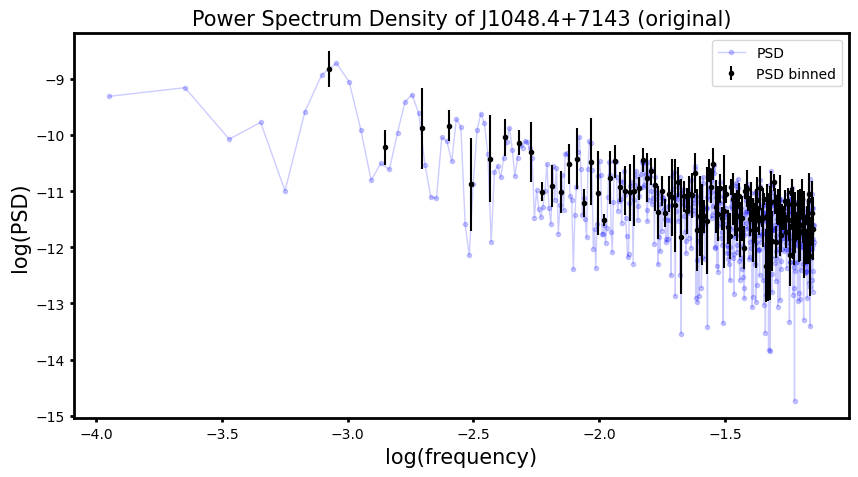

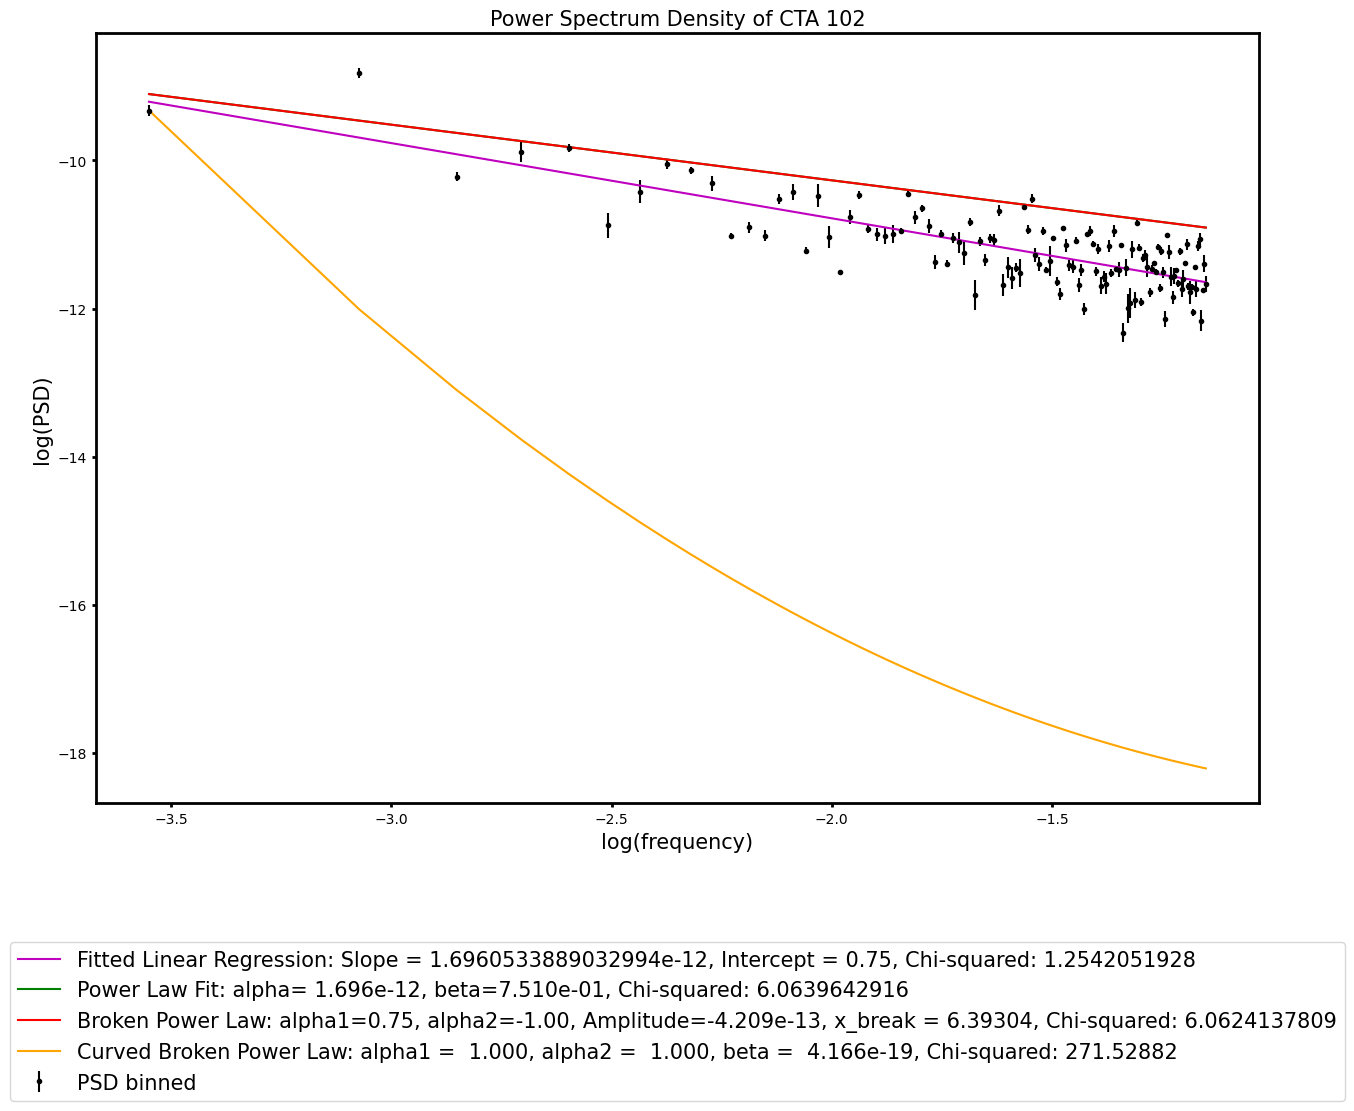

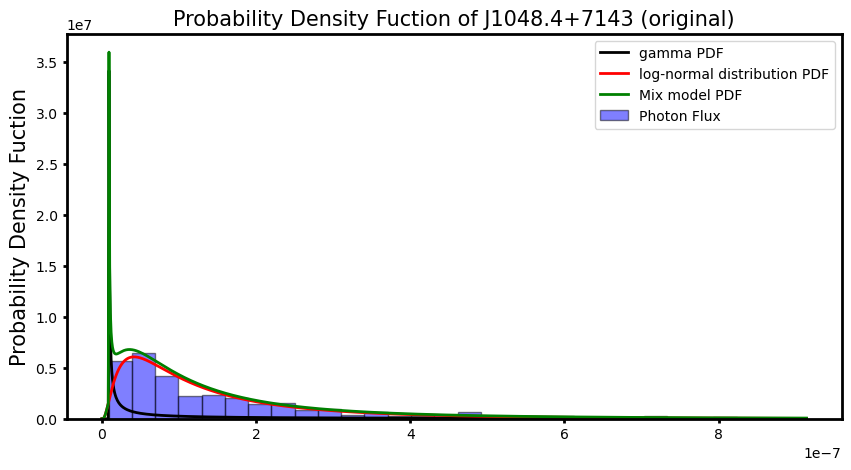

In [4]:
J1048_data = pd.read_csv('4FGL_J1048.4+7143_weekly_13_11_2023.csv')
J1048_data_filtered = J1048_data[~J1048_data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'].str.contains('<|>', na=False, case=False)]
J1048_data_filtered.to_csv('J1048_filtlight.csv')

J1048data = pd.read_csv('J1048_filtlight.csv')

fig, g = plt.subplots(figsize=(10, 5))
fig.set_facecolor('white')
dft, fj, fmean, rpsd, err_psd = psd_cal(J1048data['Julian Date'], J1048data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'], J1048data['Photon Flux Error(photons cm-2 s-1)'])
plot_psd(dft, fj, fmean, rpsd, err_psd,'Power Spectrum Density of J1048.4+7143 (original)', g)

initials_PL = [-1, -1]
initials_BPL = [1, 2, -1, -1] #amp, break, alpha1, alpha2
initials_CPL = [1, 1, 10] #alpha1, alpha2, b
models_fit(fmean, rpsd, err_psd, initials_PL, initials_BPL, initials_CPL)

fig, g = plt.subplots(figsize=(10, 5))
fig.set_facecolor('white')
kappa, theta, lnmu, lnsig, data_pdf, data_pdf2, pdf_light, pdf_light2 = pdf_cal(J1048data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
plot_pdf(data_pdf, data_pdf2, pdf_light, pdf_light2, 'Probability Density Fuction of J1048.4+7143 (original)', J1048data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'], g)



In [5]:
## Sim data:

lc_storage_paper = {}

for nn in range(n):
    lc_storage_paper[nn] = pd.read_csv('lightcurvePaper_sim_{}.dat'.format(nn), sep=r'\s+', comment='#', names=['Time', 'Flux'], engine='python')


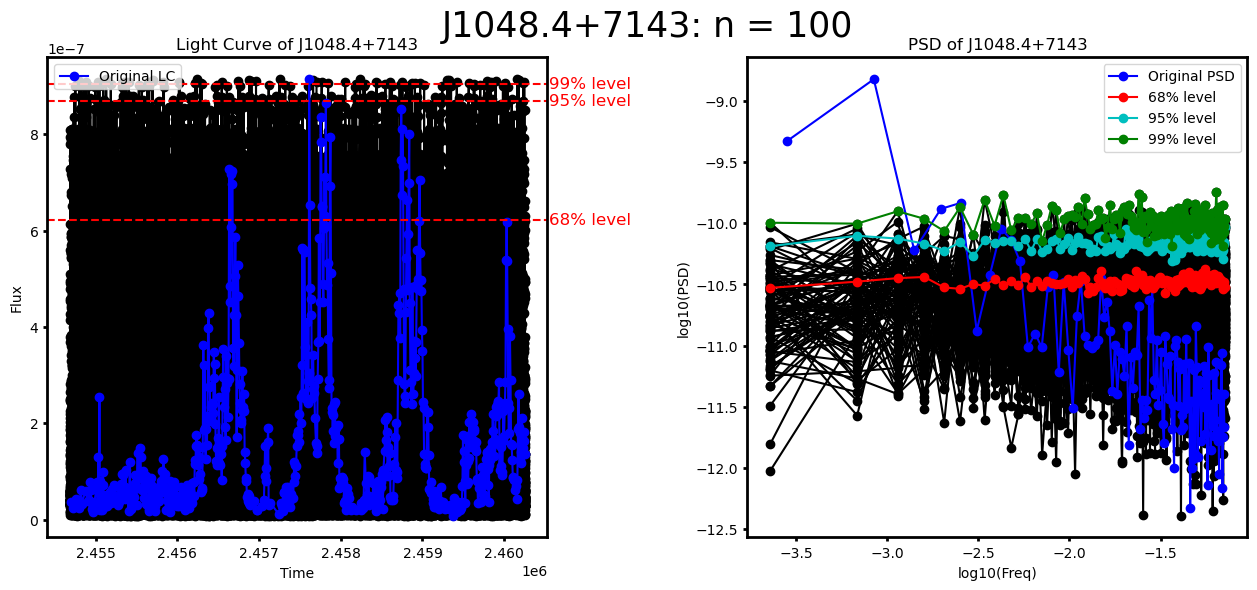

In [7]:
fig = plt.figure(figsize=(15, 6))
fig.set_facecolor('white')
fig.suptitle('J1048.4+7143: n = {}'.format(n), fontsize = 25)
gs = GridSpec(1, 2, figure=fig)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

g = fig.add_subplot(gs[0, 0])
# means = np.zeros(n)
# stds = np.zeros(n)
# conf_99_v = np.zeros(n)
# conf_95_v = np.zeros(n)
# conf_68_v = np.zeros(n)
flux_arrays = []
for NN in range(n):
    time = lc_storage_paper[NN]['Time'] 
    flux = lc_storage_paper[NN]['Flux']
#     means[NN] = np.mean(flux)
#     stds[NN] = np.std(flux)
#     conf_99_v[NN] = np.percentile(flux, 99)
#     conf_95_v[NN] = np.percentile(flux, 95)
#     conf_68_v[NN] = np.percentile(flux, 68)
    flux_arrays.append(flux)
    g.plot(time, flux, 'k-o')
g.plot(J1048data['Julian Date'], J1048data['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'], 'b-o', label = 'Original LC')
g.legend(loc = 'upper left')
g.set_title('Light Curve of J1048.4+7143')
g.set_xlabel('Time')
g.set_ylabel('Flux')
stacked_flux = np.concatenate(flux_arrays)
# un_sigma = np.mean(means) + np.mean(stds)
# two_sigma = np.mean(means) + 2 * np.mean(stds)
# three_sigma = np.mean(means) + 3 * np.mean(stds)
# four_sigma = np.mean(means) + 4 * np.mean(stds)
# five_sigma = np.mean(means) + 5 * np.mean(stds)
# print('Mean of all the LCs simulated:', np.mean(means))
# print('Standard desviation of all the LCs simulated:', np.mean(stds))
# print('1sigma level:', un_sigma)
# print('2sigma level:', two_sigma)
# print('3sigma level:', three_sigma)
# print('4sigma level:', four_sigma)
# print('5sigma level:', five_sigma)
# print('LCs simulated:')
# print('68% level:', 0.68 * max(stacked_flux))
# print('95% level:', 0.95 * max(stacked_flux))
# print('99% level:', 0.99 * max(stacked_flux))
# print('\n')
g.axhline(y = 0.68 * max(stacked_flux), linestyle='--', label = '68% level', color = 'red')
g.text(max(J1048data['Julian Date']) + 300, 0.68 * max(stacked_flux), '68% level', ha='left', va='center', color='red', fontsize=12)
g.axhline(y = 0.95 * max(stacked_flux), linestyle='--', label = '95% level', color = 'red')
g.text(max(J1048data['Julian Date']) + 300, 0.95 * max(stacked_flux), '95% level', ha='left', va='center', color='red', fontsize=12)
g.axhline(y = 0.99 * max(stacked_flux), linestyle='--', label = '99% level', color = 'red')
g.text(max(J1048data['Julian Date']) + 300, 0.99 * max(stacked_flux), '99% level', ha='left', va='center', color='red', fontsize=12)
for spine in ['top', 'right','bottom','left']:
    g.spines[spine].set_linewidth(2)
g.tick_params(labelsize=10,length=3,width=2)

g = fig.add_subplot(gs[0, 1])
# means_psd = np.zeros(n)
# stds_psd = np.zeros(n)
# conf_99_v = np.zeros(n)
# conf_95_v = np.zeros(n)
# conf_68_v = np.zeros(n)
rpsdm_array = []
for NN in range(n):
    time = lc_storage_paper[NN]['Time'] 
    flux = lc_storage_paper[NN]['Flux']
    dftm, fjm, fmeanm, rpsdm, err_psdm = psd_cal(time, flux, J1048data['Photon Flux Error(photons cm-2 s-1)'])
#     means_psd[NN] = np.mean(rpsdm)
#     stds_psd[NN] = np.std(rpsdm)
#     conf_99_v[NN] = np.percentile(rpsdm, 99)
#     conf_95_v[NN] = np.percentile(rpsdm, 95)
#     conf_68_v[NN] = np.percentile(rpsdm, 68)
    rpsdm_array.append(rpsdm)
    g.plot(np.log10(fmeanm), rpsdm, 'k-o')
g.plot(np.log10(fmean), rpsd, 'b-o', label = 'Original PSD')
nfreq = len(fmeanm)
level_68 = np.zeros(nfreq)
level_95 = np.zeros(nfreq)
level_99 = np.zeros(nfreq)
rpsdm_total = np.array(rpsdm_array)
for FFF in range(nfreq):
    data_freq_bin = sorted(rpsdm_total[:, FFF])
    
    level_68[FFF] = data_freq_bin[int(0.68 * len(data_freq_bin))]
    level_95[FFF] = data_freq_bin[int(0.95 * len(data_freq_bin))]
    level_99[FFF] = data_freq_bin[int(0.99 * len(data_freq_bin))]

g.plot(np.log10(fmeanm), level_68, 'r-o', label = '68% level')
g.plot(np.log10(fmeanm), level_95, 'c-o', label = '95% level')
g.plot(np.log10(fmeanm), level_99, 'g-o', label = '99% level')
g.legend(loc = 'best')
g.set_title('PSD of J1048.4+7143')
g.set_xlabel('log10(Freq)')
g.set_ylabel('log10(PSD)')
# rpsdm_stack = np.concatenate(rpsdm_array)
# un_sigma_psd = np.mean(means_psd) + np.mean(stds_psd)
# two_sigma_psd = np.mean(means_psd) + 2 * np.mean(stds_psd)
# three_sigma_psd = np.mean(means_psd) + 3 * np.mean(stds_psd)
# print('Mean of all the PSDs simulated:', np.mean(means_psd))
# print('Standard desviation of all the PSDs simulated:', np.mean(stds_psd))
# print('1sigma level:', un_sigma_psd)
# print('2sigma level:', two_sigma_psd)
# print('3sigma level:', three_sigma_psd)
# print('PDSs simulated:')
# print('68% level:', 0.68 * min(rpsdm_stack))
# print('95% level:', 0.95 * min(rpsdm_stack))
# print('99% level:', 0.99 * min(rpsdm_stack))
# print('\n')
# g.axhline(y = 0.68 * min(rpsdm_stack), linestyle='--', label = '68% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.68 * min(rpsdm_stack), '68% level', ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = 0.95 * min(rpsdm_stack), linestyle='--', label = '95% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.95 * min(rpsdm_stack), '95% level', ha='left', va='center', color='red', fontsize=12)
# g.axhline(y = 0.99 * min(rpsdm_stack), linestyle='--', label = '99% level', color = 'red')
# g.text(max(np.log10(fmean)) - 3.1, 0.99 * min(rpsdm_stack), '99% level', ha='left', va='center', color='red', fontsize=12)
for spine in ['top', 'right','bottom','left']:
    g.spines[spine].set_linewidth(2)
g.tick_params(labelsize=10,length=3,width=2)

